In [6]:
# importing necessary libraries
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv(r"C:\Users\Joudie\Downloads\Telco\customerChurn.csv")

In [8]:
df.shape

(7043, 21)

In [9]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [28]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
#preprocessing
df["TotalCharges"] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [11]:
df['TotalCharges'].isna().sum()

np.int64(11)

In [12]:
df = df.dropna(subset=['TotalCharges'])

In [13]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [14]:
df_encoded = pd.get_dummies(df.drop('customerID', axis=1), drop_first=True)

In [15]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7032 non-null   int64  
 1   tenure                                 7032 non-null   int64  
 2   MonthlyCharges                         7032 non-null   float64
 3   TotalCharges                           7032 non-null   float64
 4   Churn                                  7032 non-null   int64  
 5   gender_Male                            7032 non-null   bool   
 6   Partner_Yes                            7032 non-null   bool   
 7   Dependents_Yes                         7032 non-null   bool   
 8   PhoneService_Yes                       7032 non-null   bool   
 9   MultipleLines_No phone service         7032 non-null   bool   
 10  MultipleLines_Yes                      7032 non-null   bool   
 11  InternetS

In [16]:
x = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train,x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42,stratify=y
)

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [4]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', C=0.6, max_iter=2000, random_state=42,class_weight='balanced')
model.fit(x_train_scaled, y_train)

NameError: name 'x_train_scaled' is not defined

In [21]:
y_pred = model.predict(x_test_scaled)
y_pred_proba = model.predict_proba(x_test_scaled)[:,1]

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print("Acuraccy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))
print("ROC AUC", roc_auc_score(y_test, y_pred_proba))

Acuraccy:  0.7249466950959488
Precision:  0.48929159802306427
Recall:  0.7941176470588235
F1 Score:  0.6055045871559633
ROC AUC 0.8350671166997117


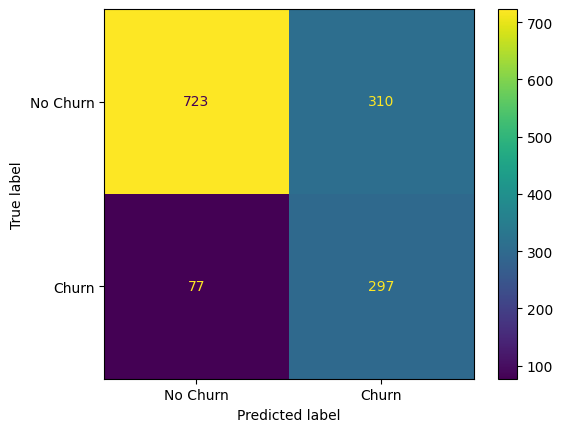

In [59]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Churn','Churn'])
disp.plot()


In [23]:
from sklearn.metrics import roc_curve, roc_auc_score 

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)
print("ROC AUC Score: ", auc_score)

ROC AUC Score:  0.8350671166997117


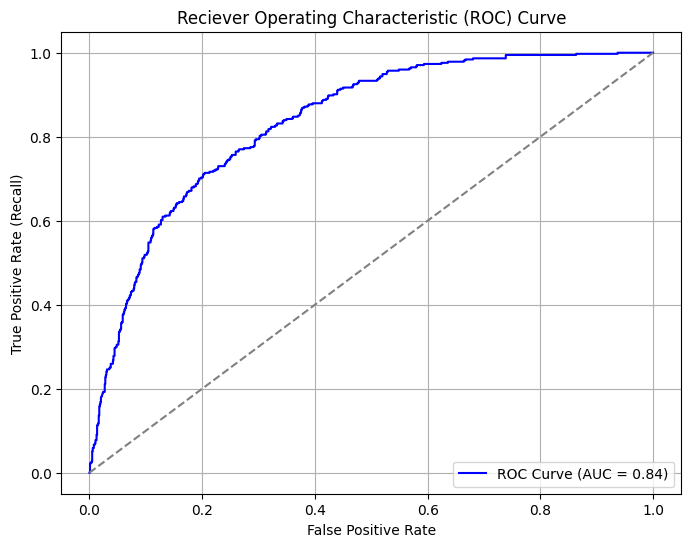

In [24]:
# plotting ROC curve 

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("Reciever Operating Characteristic (ROC) Curve")
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [25]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear','lbfgs']
}

grid = GridSearchCV(LogisticRegression(max_iter=2000), param_grid, cv=5, scoring='f1')
grid.fit(x_train_scaled, y_train)

print("Best Parameters: ", grid.best_params_)

Best Parameters:  {'C': 10, 'solver': 'lbfgs'}


In [26]:
coefficients = pd.Series(model.coef_[0], index=x.columns)
coefficients = coefficients.sort_values(key=np.abs, ascending=False)

print("Top features influencing churn:")
print(coefficients.head(10))

Top features influencing churn:
tenure                           -1.225175
MonthlyCharges                   -0.641075
Contract_Two year                -0.633933
InternetService_Fiber optic       0.631931
TotalCharges                      0.581144
Contract_One year                -0.326452
StreamingTV_Yes                   0.215177
StreamingMovies_Yes               0.208395
PaymentMethod_Electronic check    0.194793
MultipleLines_Yes                 0.180240
dtype: float64


In [27]:
# Random forest Classifier 

from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import classification_report
import joblib

# initializing and training the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

# prediction
y_pred = rf_model.predict(x_test)

# evaluation

print("Classification Report: ")
print(classification_report(y_test, y_pred))

Classification Report: 
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.63      0.52      0.57       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [75]:
from sklearn.model_selection import GridSearchCV
param_grid1 = {
    'n_estimators':[100,200,300],
    'max_depth':[None, 10,20],
    'min_samples_split':[2,5,10]
}

grid1 = GridSearchCV(RandomForestClassifier(), param_grid1, cv=5, scoring='f1')
grid1.fit(x_train, y_train)

print("Best Parameters: ", grid.best_params_)

Best Parameters:  {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}


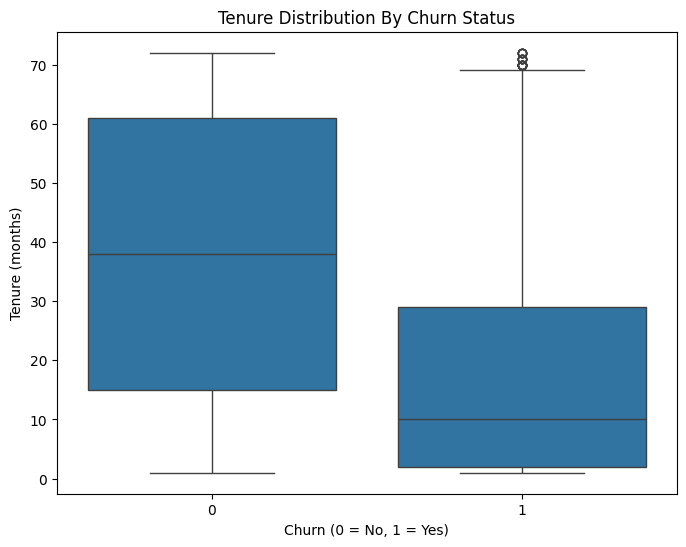

In [28]:
# box plot of tenure by churn status

plt.figure(figsize=(8,6))
sns.boxplot(x='Churn', y='tenure', data=df_encoded)
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Tenure (months)")
plt.title("Tenure Distribution By Churn Status")
plt.show()

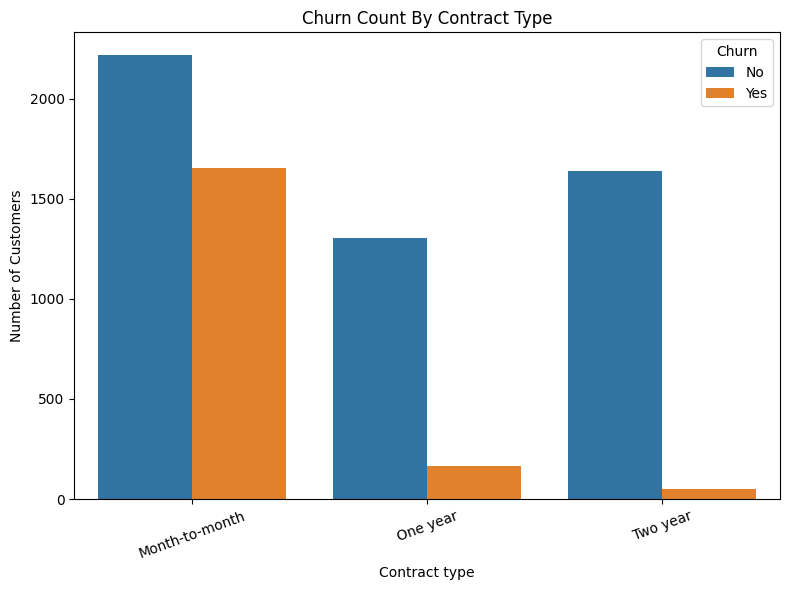

In [29]:
# customer churn by contact type

plt.figure(figsize=(8,6))
sns.countplot(x='Contract',hue='Churn', data=df)
plt.xlabel("Contract type")
plt.ylabel("Number of Customers")
plt.title("Churn Count By Contract Type")
plt.legend(title='Churn', labels=['No','Yes'])
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

In [35]:
import sys

In [36]:
!python.exe -m pip install --upgrade pip
!pip install plotly
import plotly.express as px 

df_plot = df.copy()


if df_plot['Churn'].dtype != 'object':
    df_plot['Churn'] = df_plot['Churn'].map({0: 'No', 1: 'Yes'})
fig = px.bar(
    df_plot, 
    x='Contract',
    color='Churn',
    barmode='group',
    title='Churn Count By Contract Type',
    labels={'Contract':'Contract Type', 'count': 'Number of Customers'}
    
)

fig.show()

In [6]:
import joblib
joblib.dump(model, 'churn_model.pkl')

['churn_model.pkl']

In [8]:
model = joblib.load('churn_model.pkl')